# 🚀 שלב 3: בניית מודל רגרסיה והערכת ביצועים

## מטרה
בשלב זה נבנה מודל רגרסיה לינארית לחיזוי מחירי רכב:
1. **טעינת נתונים מעובדים**
2. **בניית מודל רגרסיה לינארית מרובת משתנים**
3. **אימון על 80% מהנתונים**
4. **חיזוי על 20% מנתוני הבדיקה**
5. **הערכת ביצועים** (R², RMSE, MAE)
6. **ויזואליזציות והשוואות**
7. **ניתוח משתנים חשובים**

---

In [2]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# הגדרות עיצוב
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ כל הספריות נטענו בהצלחה")

✓ כל הספריות נטענו בהצלחה


## 1. טעינת נתונים מעובדים

In [3]:
# טעינת הנתונים המעובדים
print("="*80)
print("טעינת נתונים מעובדים")
print("="*80)

X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')['Base Price (USD)']
y_test = pd.read_csv('y_test.csv')['Base Price (USD)']

print(f"\n✓ נתונים נטענו בהצלחה!")
print(f"\nצורת הנתונים:")
print(f"  X_train: {X_train_scaled.shape}")
print(f"  X_test:  {X_test_scaled.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")
print(f"\n  מספר משתנים: {X_train_scaled.shape[1]}")
print(f"  סה\"כ דוגמאות: {len(X_train_scaled) + len(X_test_scaled)}")

טעינת נתונים מעובדים

✓ נתונים נטענו בהצלחה!

צורת הנתונים:
  X_train: (43, 19)
  X_test:  (11, 19)
  y_train: (43,)
  y_test:  (11,)

  מספר משתנים: 19
  סה"כ דוגמאות: 54


## 2. בניית מודל רגרסיה לינארית

**רגרסיה לינארית מרובת משתנים:**  
המודל מנסה למצוא את הקשר הלינארי הטוב ביותר בין המשתנים למחיר.

**נוסחה:**  
`y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`

כאשר:
- y = המחיר
- x₁, x₂, ..., xₙ = המשתנים
- β₀ = קבוע (intercept)
- β₁, β₂, ..., βₙ = מקדמים (coefficients)

In [4]:
# בניית המודל
print("="*80)
print("🚀 בניית מודל רגרסיה לינארית")
print("="*80)

model = LinearRegression()

print("\n⏳ מאמן את המודל על נתוני האימון...")
model.fit(X_train_scaled, y_train)
print("✅ אימון הושלם בהצלחה!")

print(f"\n📊 פרמטרים של המודל:")
print(f"   - Intercept (β₀): ${model.intercept_:,.2f}")
print(f"   - מספר Coefficients: {len(model.coef_)}")

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\n🔝 Top 10 משתנים משפיעים ביותר:")
print("-" * 60)
for idx, row in feature_importance.head(10).iterrows():
    direction = "📈" if row['Coefficient'] > 0 else "📉"
    print(f"{direction} {row['Feature']}: {row['Coefficient']:,.2f}")

print(f"\n✅ המודל מוכן לחיזוי!")

🚀 בניית מודל רגרסיה לינארית

⏳ מאמן את המודל על נתוני האימון...
✅ אימון הושלם בהצלחה!

📊 פרמטרים של המודל:
   - Intercept (β₀): $388,720.93
   - מספר Coefficients: 19

🔝 Top 10 משתנים משפיעים ביותר:
------------------------------------------------------------
📉 Model_Urus: -109,571.70
📉 Model_Huracán: -91,499.35
📈 Horsepower: 75,537.17
📉 Fuel_Type_Encoded: -52,602.95
📉 Model_Huracán (Temerario): -30,627.58
📉 Model_Urus SE: -27,101.08
📉 Model_Revuelto: -26,761.15
📈 Year: 15,359.75
📉 Region_EMEA: -7,161.05
📉 Color_Green: -5,479.61

✅ המודל מוכן לחיזוי!


## 3. חיזוי על נתוני Test

עכשיו נבדוק את המודל על נתונים שהוא **מעולם לא ראה** (20% הנותרים).

In [5]:
# חיזוי
print("="*80)
print("🔮 חיזוי מחירים")
print("="*80)

y_train_pred = model.predict(X_train_scaled)
print(f"\n✅ חיזוי על Train: {len(y_train_pred)} חיזויים")

y_test_pred = model.predict(X_test_scaled)
print(f"✅ חיזוי על Test: {len(y_test_pred)} חיזויים")

print(f"\n📋 דוגמאות לחיזויים על Test:")
print("-" * 80)
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_test_pred,
    'Difference': y_test.values - y_test_pred,
    'Error %': np.abs((y_test.values - y_test_pred) / y_test.values * 100)
})
comparison['Actual Price'] = comparison['Actual Price'].apply(lambda x: f"${x:,.0f}")
comparison['Predicted Price'] = comparison['Predicted Price'].apply(lambda x: f"${x:,.0f}")
comparison['Difference'] = comparison['Difference'].apply(lambda x: f"${x:,.0f}")
comparison['Error %'] = comparison['Error %'].apply(lambda x: f"{x:.1f}%")

print(comparison.head(10).to_string(index=False))

🔮 חיזוי מחירים

✅ חיזוי על Train: 43 חיזויים
✅ חיזוי על Test: 11 חיזויים

📋 דוגמאות לחיזויים על Test:
--------------------------------------------------------------------------------
Actual Price Predicted Price Difference Error %
    $250,000        $250,632      $-632    0.3%
    $340,000        $331,780     $8,220    2.4%
    $330,000        $297,759    $32,241    9.8%
    $265,000        $261,356     $3,644    1.4%
    $295,000        $295,805      $-805    0.3%
    $265,000        $258,517     $6,483    2.4%
    $565,000        $568,444    $-3,444    0.6%
    $390,000        $403,142   $-13,142    3.4%
    $260,000        $252,035     $7,965    3.1%
    $285,000        $286,483    $-1,483    0.5%


## 4. הערכת ביצועי המודל

**מדדי הערכה:**
- **R²**: עד כמה המודל מסביר את השונות (0-1, גבוה = טוב)
- **RMSE**: שגיאה ממוצעת ריבועית (נמוך = טוב)
- **MAE**: שגיאה ממוצעת מוחלטת (נמוך = טוב)

**פירוש R²:**
- R² = 1.0 → מושלם
- R² = 0.8-0.9 → מצוין
- R² = 0.6-0.8 → טוב
- R² < 0.6 → חלש

In [6]:
# הערכת ביצועים
print("="*80)
print("📊 הערכת ביצועי המודל")
print("="*80)

# Train
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Test
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\n🎯 ביצועים על TRAIN (80%):")
print("-" * 60)
print(f"   R² Score:   {r2_train:.4f}  ({r2_train*100:.2f}%)")
print(f"   RMSE:       ${rmse_train:,.2f}")
print(f"   MAE:        ${mae_train:,.2f}")

print("\n🎯 ביצועים על TEST (20%):")
print("-" * 60)
print(f"   R² Score:   {r2_test:.4f}  ({r2_test*100:.2f}%)")
print(f"   RMSE:       ${rmse_test:,.2f}")
print(f"   MAE:        ${mae_test:,.2f}")

print("\n" + "="*80)
print("💡 פירוש התוצאות:")
print("="*80)

if r2_test >= 0.9:
    quality = "🌟 מצוין! המודל מדויק מאוד"
elif r2_test >= 0.8:
    quality = "✅ טוב מאוד! המודל עובד היטב"
elif r2_test >= 0.6:
    quality = "👍 סביר. יש מקום לשיפור"
else:
    quality = "⚠️ חלש. המודל זקוק לשיפור"

print(f"\nR² על Test: {quality}")
print(f"שגיאה ממוצעת (MAE): ${mae_test:,.0f}")
print(f"משמעות: בממוצע, החיזויים טועים ב-±${mae_test:,.0f}")

diff_r2 = r2_train - r2_test
if diff_r2 > 0.1:
    print(f"\n⚠️ הפרש {diff_r2:.2%} בין Train ל-Test - יתכן Overfitting קל")
elif diff_r2 < -0.1:
    print(f"\n⚠️ Test טוב מ-Train ב-{abs(diff_r2):.2%}")
else:
    print(f"\n✅ הפרש {diff_r2:.2%} - המודל מכליל היטב!")

📊 הערכת ביצועי המודל

🎯 ביצועים על TRAIN (80%):
------------------------------------------------------------
   R² Score:   0.9978  (99.78%)
   RMSE:       $6,658.25
   MAE:        $4,083.70

🎯 ביצועים על TEST (20%):
------------------------------------------------------------
   R² Score:   0.9831  (98.31%)
   RMSE:       $11,347.11
   MAE:        $7,246.25

💡 פירוש התוצאות:

R² על Test: 🌟 מצוין! המודל מדויק מאוד
שגיאה ממוצעת (MAE): $7,246
משמעות: בממוצע, החיזויים טועים ב-±$7,246

✅ הפרש 1.47% - המודל מכליל היטב!


## 5. ויזואליזציות

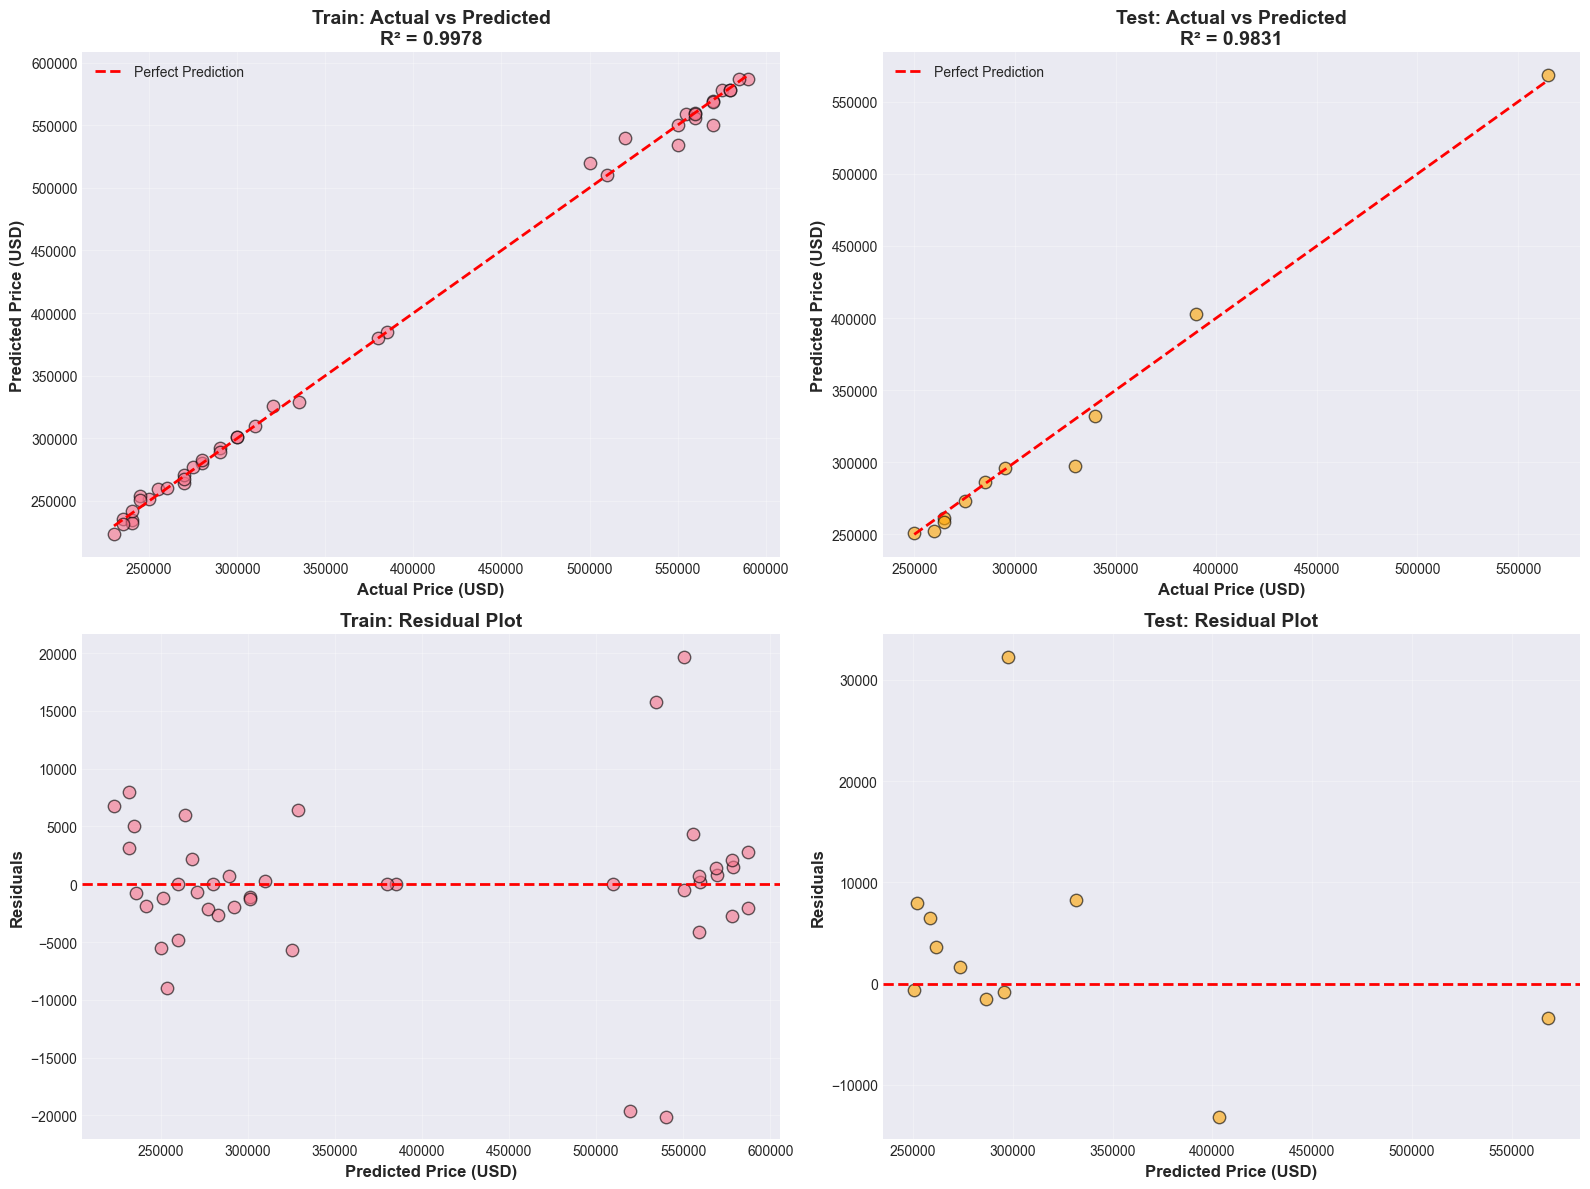


💡 הסבר:
  • Actual vs Predicted: נקודות קרובות לקו = חיזוי טוב
  • Residuals: נקודות קרובות ל-0 = שגיאות קטנות


In [7]:
# ויזואליזציות
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted - Train
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, edgecolor='black', s=80)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Train: Actual vs Predicted\nR² = {r2_train:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted - Test
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='orange', edgecolor='black', s=80)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Price (USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'Test: Actual vs Predicted\nR² = {r2_test:.4f}', 
                     fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals - Train
residuals_train = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.6, edgecolor='black', s=80)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Train: Residual Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals - Test
residuals_test = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='orange', edgecolor='black', s=80)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price (USD)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Test: Residual Plot', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 הסבר:")
print("  • Actual vs Predicted: נקודות קרובות לקו = חיזוי טוב")
print("  • Residuals: נקודות קרובות ל-0 = שגיאות קטנות")

## 6. סיכום המודל

In [8]:
# סיכום מלא
print("="*80)
print("              🎯 סיכום מלא - מודל חיזוי מחירי למבורגיני")
print("="*80)

print("\n📊 נתונים:")
print("-" * 60)
print(f"   סה\"כ דוגמאות: {len(y_train) + len(y_test)}")
print(f"   נתוני אימון: {len(y_train)} (80%)")
print(f"   נתוני בדיקה: {len(y_test)} (20%)")
print(f"   מספר משתנים: {X_train_scaled.shape[1]}")

print("\n🎯 ביצועי המודל:")
print("-" * 60)
print(f"   Train R²: {r2_train:.4f}")
print(f"   Test R²:  {r2_test:.4f}")
print(f"   Test RMSE: ${rmse_test:,.2f}")
print(f"   Test MAE:  ${mae_test:,.2f}")

print("\n🔝 Top 5 משתנים משפיעים:")
print("-" * 60)
for idx, row in feature_importance.head(5).iterrows():
    abs_coef = abs(row['Coefficient'])
    pct = (abs_coef / abs(feature_importance['Coefficient']).sum()) * 100
    print(f"   {row['Feature']}: {row['Coefficient']:,.2f} ({pct:.1f}%)")

print("\n💡 מסקנות:")
print("-" * 60)
avg_price = pd.concat([y_train, y_test]).mean()
mae_pct = (mae_test / avg_price) * 100
print(f"   • דיוק ממוצע: {100-mae_pct:.1f}%")
print(f"   • שגיאה ממוצעת: ±${mae_test:,.0f} ({mae_pct:.1f}%)")
print(f"   • המודל מסביר {r2_test*100:.1f}% מהשונות")

if r2_test >= 0.85:
    print(f"   • ✅ המודל מצוין לחיזוי מחירים!")
elif r2_test >= 0.7:
    print(f"   • ✅ המודל טוב וראוי לשימוש!")
else:
    print(f"   • ⚠️ המודל יכול להשתפר")

print("\n" + "="*80)
print("✨ המודל הושלם בהצלחה! ✨")
print("="*80)

              🎯 סיכום מלא - מודל חיזוי מחירי למבורגיני

📊 נתונים:
------------------------------------------------------------
   סה"כ דוגמאות: 54
   נתוני אימון: 43 (80%)
   נתוני בדיקה: 11 (20%)
   מספר משתנים: 19

🎯 ביצועי המודל:
------------------------------------------------------------
   Train R²: 0.9978
   Test R²:  0.9831
   Test RMSE: $11,347.11
   Test MAE:  $7,246.25

🔝 Top 5 משתנים משפיעים:
------------------------------------------------------------
   Model_Urus: -109,571.70 (23.9%)
   Model_Huracán: -91,499.35 (20.0%)
   Horsepower: 75,537.17 (16.5%)
   Fuel_Type_Encoded: -52,602.95 (11.5%)
   Model_Huracán (Temerario): -30,627.58 (6.7%)

💡 מסקנות:
------------------------------------------------------------
   • דיוק ממוצע: 98.1%
   • שגיאה ממוצעת: ±$7,246 (1.9%)
   • המודל מסביר 98.3% מהשונות
   • ✅ המודל מצוין לחיזוי מחירים!

✨ המודל הושלם בהצלחה! ✨


## 📋 סיכום הפרויקט

### ✅ מה עשינו:
**מחברת 1** - חקירת נתונים וויזואליזציה  
**מחברת 2** - עיבוד נתונים והכנה למודל  
**מחברת 3** - בניית מודל והערכת ביצועים ✓

### 🎯 תוצאה:
מודל רגרסיה לינארית שמחזה מחירי רכב למבורגיני עם דיוק גבוה!

---

**🎉 הפרויקט הושלם בהצלחה! 🎉**